# 시계열분석 ARIMA,SARIMA_weekly data 
#### 데이터 기간 : 약 3년 6개월

## **시계열 활용**
* 추세/계절성 파악 및 대응 : 수요량 계산을 위한 수요 전망 계산
* 이상치 파악 
    * 이전 시계열 데이터를 이용한 향후 전망 계산
    * 측정시점에서 계산된 신뢰구간을 벗어난 데이터 확인 (outlier)
    * 해당 결과가 일시적 변화인지 계속적인 변화인지 확인
        * 일시적 변화는 원인 분석 후 조치
        * 계속적 변화는 시계열 모델에 반영하여 새로운 전망 계산

## **시계열 패턴** 
* 추세 
    * 데이터가 장기적으로 증가하거나 감소할 때, 추세가 존재한다. 
* 계절성
    * 해마다 어떤 특정한 때나 1주일마다 특정 요일에 나타나는 것 같은 계절성 요인이 시계열에 영향을 줄 때 계절성 패턴이 나타난다.
* 주기성
    * 고정된 빈도가 아닌 형태로 증가나 감소하는 모습을 보일 때 주기가 나타난다. 
      보통 이러한 요동은 경제 상황 때문에 일어나고, 보통 이러한 요동의 지속기간은 적어도 2년 이상이다.
      
----------------------------------------------------------------------------------------------------------------
## **비정적 데이터를 정적 데이터로 변환 방법**
#### **차분 (diff) :**
* 1차 차분 = X(t) - X(t-1)
* 차이값은 데이터의 차수를 줄여 정적(Stationary)에 가깝게 한다.
    * 차분값은 다항식의 차수를 낮춰준다.
* 2차 차분 : $(y_t - y_{t-1}) - (y_{t-1} - y_{t-2})$
= $y_t - 2y_{t-1} + y_{t-2}$
    
#### **계절성 차분**
* 관측치와, 같은 계절의 이전 관측값과의 차이
    
#### **로그(log) 변환 :**
* 데이터의 진폭이 시간에 따라 증가 (분산의 증가) 데이터 대상
* 로그(log)는 곱을 합으로 변환 -> 분산의 증가 억제

----------------------------------------------------------------------------------------------------------------
## **정상시계열과 비정상 시계열의 특징**

### 정상성 
* 언제 관찰하는지에 상관이 없고, 시간에 따라 어떤 시점에서 보더라도 똑같이 보임.
* 추세나 계절성이 있는 시계열은 정상성을 나타내는 시계열이 아님. 
    * 주기성 행동을 가지고 있는 (하지만 추세나 계졀성은 없는) 시계열은 정상성을 나타내는 시계열이다.
    
        * 1)평균이 일정 : 모든 시점에 대해 일정한 평균을 가진다.
                 - 평균이 일정하지 않은 시계열은 차분을 통해 정상화
                 - 차분은 현시점 자료에서 이전 시점 자료를 빼는 것 <br>
        * 2)분산도 시점에 의존하지 않음
                 - 분산이 일정하지 않은 시계열은 변환을 통해 정상화
        * 3)공분산도 시차에만 의존할 뿐, 특정 시점에는 의존하지 않음.
                 - 공분산 : 확률변수들이 어떻게 퍼져있는지를 나타냄 (X가 증가할때 Y도 증가하는지, 감소하는지 등)


| 정상시계열 | 비정상시계열 |
| --- | --- |
| * 뚜렷한 추세가 없다 | * 평균수준이 시간대에 따라 다르다. 추세를 가진다. | 
| * 진폭이 시간의 흐름에 따라 일정하다. | * 계절성을 가진다. | 
| * 분산이 변한다. | 

----------------------------------------------------------------------------------------------------------------
## **시계열 모형 : AR , MA, ARMA, ARIMA 모형, 분해 시계열**
### [1] AR 모형 (자기회귀) : 
시계열 데이터 Yt에서 시점 r의 관측치 Yt가 과거 관측치 Y(t-1), Y(t-2) 들에 의해 설명될 때 AR(p) 모형을 따른다고 한다. <br>
즉, 확률적 추세를 제거하기 위함. 부분 자기상관이 있는 차수의 종속변수를 모형에 반영해서 해당 차수의 확률적 추세가 만드는 불안정성을 제거하는 모형 <br>
=> AR 모형은 백색 잡음의 현재값과 자기 자신의 과거값의 선형 가중합으로 이루어진 정상 확률 모형. <br>
### $Yt = u + a_1Y_{t-1} + a_2Y_{t-2} + ... + a_pY_{t-p} + e_t$ ($e_t$ : 백색잡음)

#### AR(1) 모형
* 백색 잡음의 현재값과 1스텝 과거의 자기 자신의 값만의 가중합으로 이루어진 모형. <br>
#### $Y_t = -\phi Y_{t-1} + \epsilon_t$  <br>
(theta는 자기상관계수, epsilon은 white noise)

#### AR(2) 모형
* 백색 잡음의 현재값과 1스텝 과거의 자기 자신의 값, 그리고 2스텝 과거의 자기 자신의 값의 가중합으로 이루어진 모형. <br>
#### $Y_t = -\phi_1 Y_{t-1} -\phi_2 Y_{t-2} + \epsilon_t $

### [2] MA 모형 (이동평균) :
시계열 데이터 Yt에서 시점 r의 관측치 Yt가 과거 오차 e(t-1), e(t-2), 들에 의해 설명될 때 MA(q) 모형을 따른다고 한다.<br>
즉, 불규칙한 변동을 제거하기 위한 모형. <br>
### $Y_t = e_t -\beta_1 e_{t-1} - \beta_2 e_{t-2} - ... -\beta_q e_{t-4}$

#### MA(1) 모형
* 백색 잡음의 현재 값과 1- 시간 지연된 과거 값, 그리고 2-시간 지연된 과거 값의 선형 가중합으로 나타난다. <br>
#### $Y_t = \epsilon_t + \theta_1 \epsilon_{t-1} $ 
(beta는 이동평균계수, epsilon은 t시점의 오차항)

#### MA(2) 모형
* 백색 잡음의 현재 값과 1 스텝 지연된 과거 값의 합이다. <br>
#### $Y_t = \epsilon_t + \theta_1 \epsilon_{t-1} +\theta_2 \epsilon_{t-2}$

### [3] ARMA 모형 :
시계열 데이터 Yt에서 시점 r의 관측치 Yt가 과거 관측치 Y(t-1), Y(t-2) 들과 과거 오차 e(t-1), e(t-2), 들에 의해 설명될 때 ARMA(p,q) 모형을 따른다고 한다.

**ARMA(1,1)모형** <br>
#### $x_t = {a_1 * X_{t-1}} + {b * e_{t-1}} + c + u * e_t$ <br>

**ARMA(2,2) 모형** <br>
#### $x_t = {a_1 * X_{t-1}+ a_2 * X_{t-2}} + {b* e_{t-1} + b2 * e_{t-2}} + c + u * e_t$ <br>
* AR(p) = ARIMA(p,0,0) <br>
* MA(q) = ARIMA(0,0,q) <br>
* ARMA(p,q) = ARIMA(p,0,q) <br>

### [4] ARIMA 모형 (p,d,q)
비정상 시계열 모형. 차분이나 변환을 통해 AR, MA, 또는 ARMA 모형으로 정상화
* p : 자기회귀 차수
* d : 차분 차수
* q : 이동평균 차수

### ※ARMA 와 ARIMA 차이점 :
ARIMA의 경우 시계열의 비정상성을 설명하기 위해 관측치간의 차분을 사용함
* 비정상성을 제거하는 과정을 포함한 것이 ARIMA모형

(+) 상관 함수 : ACF, PACF (ARMA 모형 진단에 사용)

### [5] 분해 시계열
시계열에 영향을 주는 일반적인 요인을 시계열에서 분리해 분석하는 방법
* 계절 변동 : 4계절을 주기로 나타나는 변동 <br>
    (순환변동이 나타나는 주기는 2~3년정도인데, 계절변동은 1년을 주기로 나타남.) <br>
* 추세 변동 : 장기간에 걸쳐 어떤 추세를 보이면서 변하는 것
* 순환 변동 : 장기간의 추세선을 따라 주기적으로 오르고 내리는 반복 현상 <br>
    (추세변동은 장기적으로 나타나는 추세경향이지만 순환변동은 2~3년 정도의 일정한 기간을 주기로 순환적으로 나타남.)
* 불규칙 변동 : 우연적으로 발생하는 요인 <br>
    (시계열자료에서 추세변동 순환변동 계절변동 요인을 조정한 후에 나타나는 변동이 불규칙변동이다.)

----------------------------------------------------------------------------------------------------------------
## **ACF(자기상관 함수), PACF(부분 상관함수)**
* ACF (Auto correlation function) : Lag(시간지연 연산자)에 따른 관측치들 사이의 관련성을 측정하는 함수
* PACF (Partial autocorrelation function) : k이외의 모든 다른 시점 관측치의 영향력을 배제하고 yt 와 yt-k 두 관측치의 관련성을 측정하는 함수

## **ARMA(p,q)과정의 ACF와 PACF의 이론적인 특성**
| 확률과정 | ACF | PACF |
| --- | --- | --- |
| AR(p) | 지수적으로 감소하거나 소멸하는 싸인함수 형태 | 시차 p이후에는 0으로의 절단형태 |
| MA (q) | 시차 q이후에는 0으로의 절단형태 | 지수적으로 감소하거나 소멸하는 싸인함수 형태 |
| ARMA (p,q) | 시차(q-p)이후에는 지수적으로 감소하거나 소멸하는 사인함수 형태 | 시차(q-p)이후에는 지수적으로 감소하거나 소멸하는 사인함수 형태 |

* ACF가 서서히 감소하고, PACF가 급격히 0에 근접한 값을 가지면 AR(p)모형 선정
* ACF가 급격히 0에 근접한 값을 가지고, PACF가 서서히 감소하면 MA(q)모형 선정
* ACF, PACF 모두 특정 차수 이상에서 없어지는 현상이 나타나지 않는다면 ARMA 모형을 사용해야 한다.

< 차수 결정 방법 >
MA의 차수는 ACF로, AR의 차수는 PACF로 결정.

----------------------------------------------------------------------------------------------------------------
## Process 정리
* 식별 (Identification) <br>
    시계열이 계절적 특성을 띄는지, 안정적인지 여부를 판단.<br>
    이 과정에서 SARIMA(p,d,q)(P,D,Q)s 모형 가운데 d 와 D 그리고 s 의 값을 결정하게 된다. <br>
    이어서 acf, pacf를 통해 p(AR의차수) 와 q(MA의차수) 그리고 P(SAR의차수), Q(SMA의 차수)값을 추정한다.<br>
    
* 추정 (Estimation of Parameter)<br>
    앞선 식별단계를 통해 알아낸 p,d,q,P,D,Q 값들 가운데 통계적으로 가장 적합한 값을 결정한다.<br>
    이와 함께  p,d,q,P,D,Q 값이 정해지면서 결정되는 AR, MA, SAR, SMA각 항들에 대한 모수를 추정하게 된다. <br>
    각 항들의 모수를 추정하는 대표적인 추정법으로는 최대우도 추정법, 최소제곱 추정법, 비선형 추정법 등이 있다.<br>
    
* 진단 (Diagnosis)<br>
    추정된 모형에 대한 통계적 진단을 하는 단계. 통계적으로 유의한지 여부와 모형이 과연 예측모형으로써 적절한지 여부.<br>
    주로 잔차분석, 과적합진단 등을 통해 전체 모형을 진단.<br>
    
* 예측 (Forecasting)<br>
    선택된 최종모델을 활용하여 예측.
    
----------------------------------------------------------------------------------------------------------------


In [2]:
import os
print (os.getcwd()) #현재 디렉토리의

/data2/home/suhyuncho/personal/study/Time-Series


In [3]:
from pyhive import hive

conn = hive.Connection(host='hd-admin.medus.search',
                      port=10000,
                      username='medus')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# warning 무시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터탐색 (EDA)

In [152]:
df = pd.read_csv('./weekly data.csv')

In [27]:
df_monthly = pd.read_csv('./monthly data.csv')

In [153]:
df.shape

(191, 5)

In [154]:
# weekly data
df = df.rename(columns={"Time":"date","PV":"pv","UV":"uv"})
df.head()

,date,pv,PV (W/O Noactive),uv,UV (W/O Noactive)
0,2015-12-03,124339820,92402319,6982501,3315301
1,2015-12-10,121712570,91254713,6425498,3142306
2,2015-12-17,124845671,93283480,6879064,3332168
3,2015-12-24,117763798,88023596,6329680,3088408
4,2015-12-31,110181434,81874047,6533773,3157320


In [38]:
# monthly data
df_monthly = df_monthly.rename(columns={"Time":"date", "PV":"pv","UV":"uv"})
df_monthly.head()

,date,pv,PV (W/O Noactive),uv,UV (W/O Noactive)
0,2015-12-31,534839600,461432110,18040963,8519434
1,2016-01-31,519828623,450797355,17592750,8436258
2,2016-02-29,467603274,402366321,15816608,7575439
3,2016-03-31,524981334,454427009,17216884,8249748
4,2016-04-30,478457653,412124488,15396712,7411397


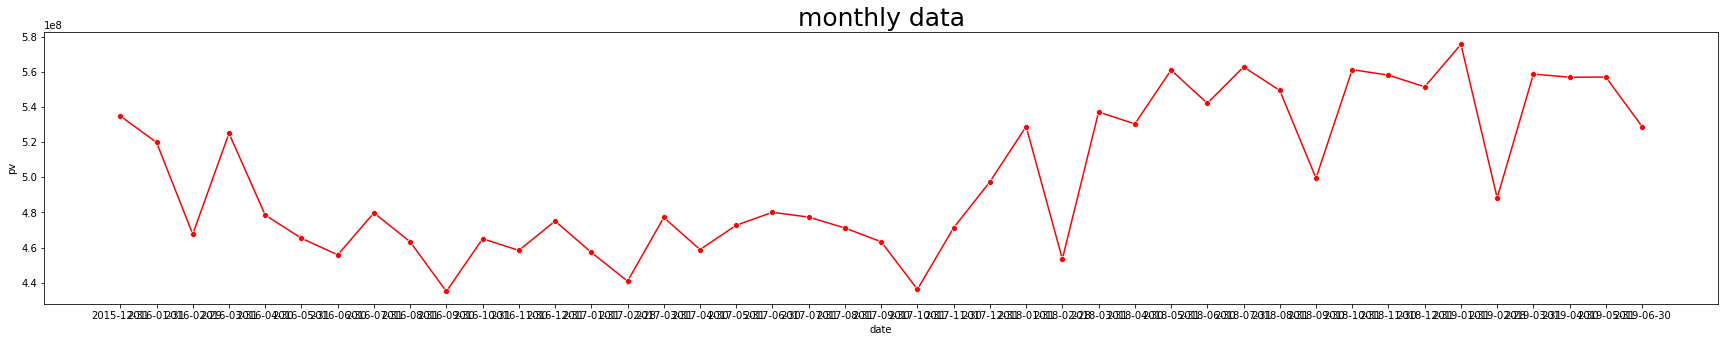

In [43]:
plt.figure(figsize = (30,5))
sns.lineplot(x = "date", y="pv",marker = "o",data = df_monthly, color = 'red')
plt.title("monthly data" , size = 25)
plt.show()

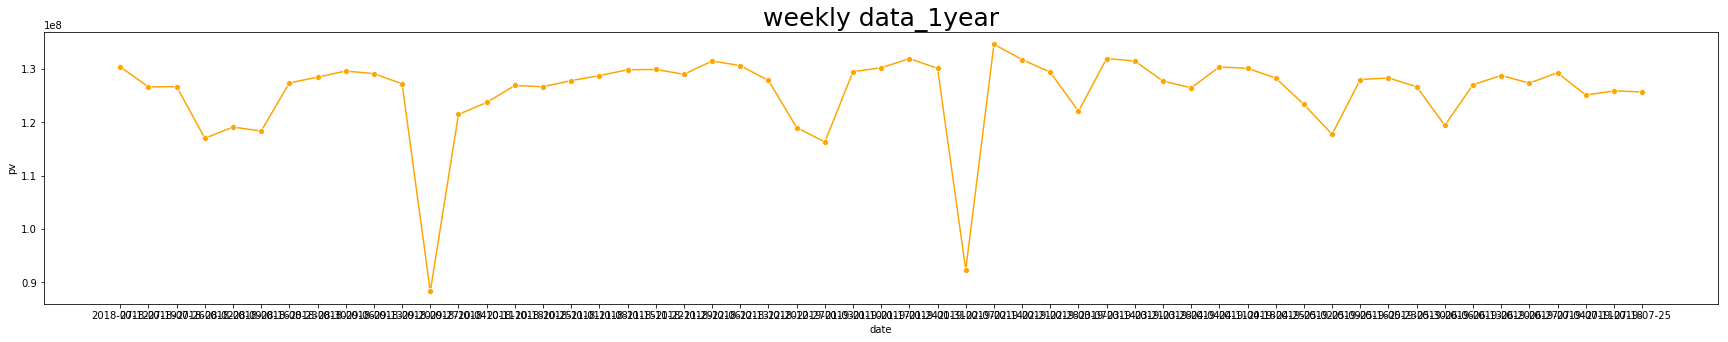

In [40]:
plt.figure(figsize = (30,5))
sns.lineplot(x = "date", y="pv",marker = "o",data = df[136:], color = 'orange') # 1년 weekly data
plt.title("weekly data_1year" , size = 25)
plt.show()

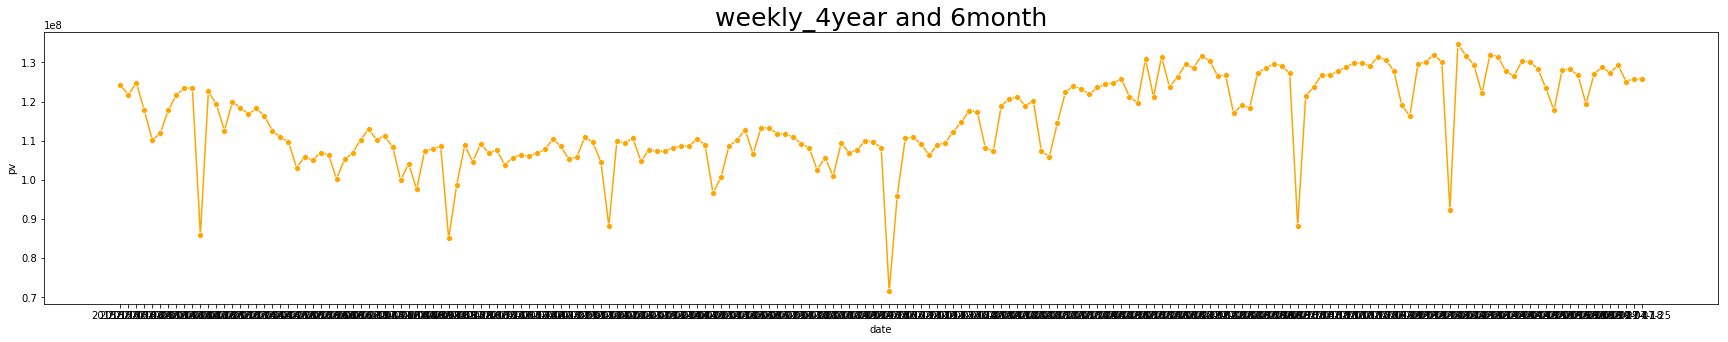

In [42]:
plt.figure(figsize = (30,5))
sns.lineplot(x = "date", y="pv",marker = "o",data = df, color = 'orange')
plt.title("weekly_4year and 6month" , size = 25)
plt.show()

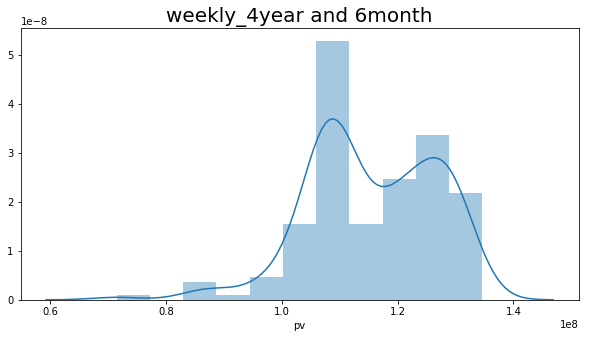

In [229]:
plt.figure(figsize=(10,5))
sns.distplot(df['pv'])
plt.title("weekly_4year and 6month", size = 20)
plt.show()

## STL Decomposition (Seasonal Trend Decomposition using Loses)
시계열 데이터를 Trend와 Seasonal Component로 나누고 나머지를 Residual Component로 구분해주는 방식. 
Decomposition을 수행할 때의 주기는 사용자의 입력을 받음 (freq값)

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

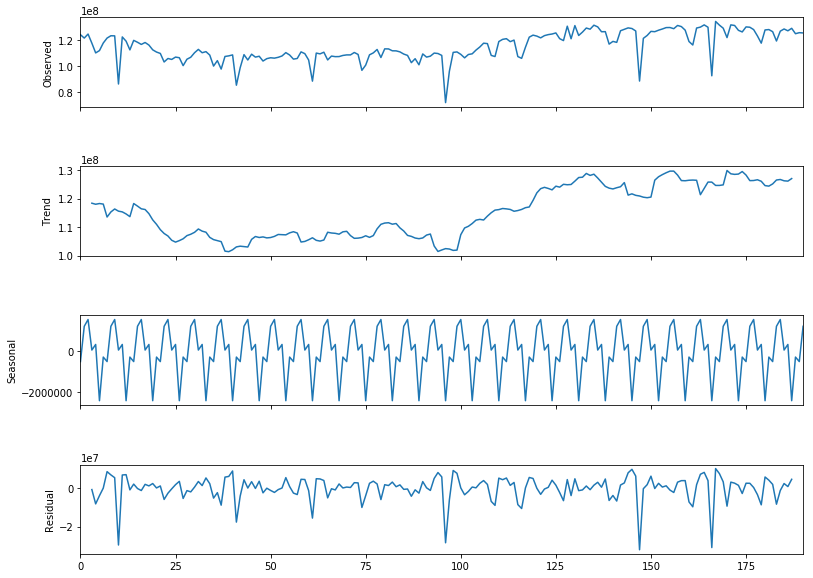

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['pv'], freq=7)   # freq값은 주기 
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(13,9)

# 정상성 검정

#### **ADF검정** -> 정상성을 알아보기 위한 단위 검정 
* 귀무가설 : 시계열이 비안정적이다.
* 대립가설 : 시계열이 안정적.

Augmented Dickey-Fuller(ADF) 검정은 1차 누적에 의한 확률적 추세뿐 아니라 2차항으로 나타나는 결정론적 추세를 포함하는 시계열에 대해서 
단위근 검정을 할 수 있도록 DF검정을 일반화 한 것이다.

#### **단위근 검정**
더 객관적으로 차분을 구하는 것이 필요할 지 결정하기 위해 사용하는 한 가지 방법.

* 반환값
    * pdf : 검정 통계량
    * p-value
    * usedlag : 사용된 시차의 수
    * nobs :분석에 자료의 수
    * critical values : 1%, 5%, 10%수준에 해당되는 검정 통계량의 값

In [47]:
from statsmodels.tsa.stattools import adfuller

In [48]:
print( "검정통계량:" ,adfuller(df['pv'])[0])
print( "p-value:" ,adfuller(df['pv'])[1])
print( "사용된 시차의 수:" ,adfuller(df['pv'])[2])
print( "자료의 수:" ,adfuller(df['pv'])[3])
print( "1%,5%,10%수준에 해당되는 검정통계량의 값:" ,adfuller(df['pv'])[4])

검정통계량: -1.226490987858205
p-value: 0.6620974248506204
사용된 시차의 수: 6
자료의 수: 184
1%,5%,10%수준에 해당되는 검정통계량의 값: {'1%': -3.466398230774071, '5%': -2.8773796387256514, '10%': -2.575213838610586}


# 데이터 변환
* 로그변환 :시계열의 분산 변화를 일정하게 만드는데 용이
* 차분 :1차차분.Trend제거하는데 용이
    * 과차분인것 보다는 최소차분이 낫다. if 과차분일 경우 MA term을 추가하고, 최소차분일 경우 AR term을 추가해라.
* Box-Cox변환 : 정규분포로 변환

### 차분
* 2차 차분 시 : df['uv'].diff().diff() 는 1차차분한 결과를 가지고 또 다시 현재값과 이전값을 빼주는 것 <br>
df['uv'].diff(2) 는 현재값과 두개 이전의 값을 빼주는 것. <br>
=> 여기서의 2차 차분은 **df['uv'].diff(2)** 이게 맞음

In [49]:
diff = df['pv'].diff().dropna(inplace=False)
diff.head()

1   -2627250.0
2    3133101.0
3   -7081873.0
4   -7582364.0
5    1802031.0
Name: pv, dtype: float64

In [50]:
# 1차 차분 결과  => 정상성 만족 
print( "검정통계량:" ,adfuller(diff)[0])
print( "p-value:" ,adfuller(diff)[1])
print( "사용된 시차의 수:" ,adfuller(diff)[2])
print( "자료의 수:" ,adfuller(diff)[3])
print( "1%,5%,10%수준에 해당되는 검정통계량의 값:" ,adfuller(diff)[4])

검정통계량: -8.484854742867872
p-value: 1.3619895615787874e-13
사용된 시차의 수: 6
자료의 수: 183
1%,5%,10%수준에 해당되는 검정통계량의 값: {'1%': -3.466598080268425, '5%': -2.8774669520682674, '10%': -2.5752604356654425}


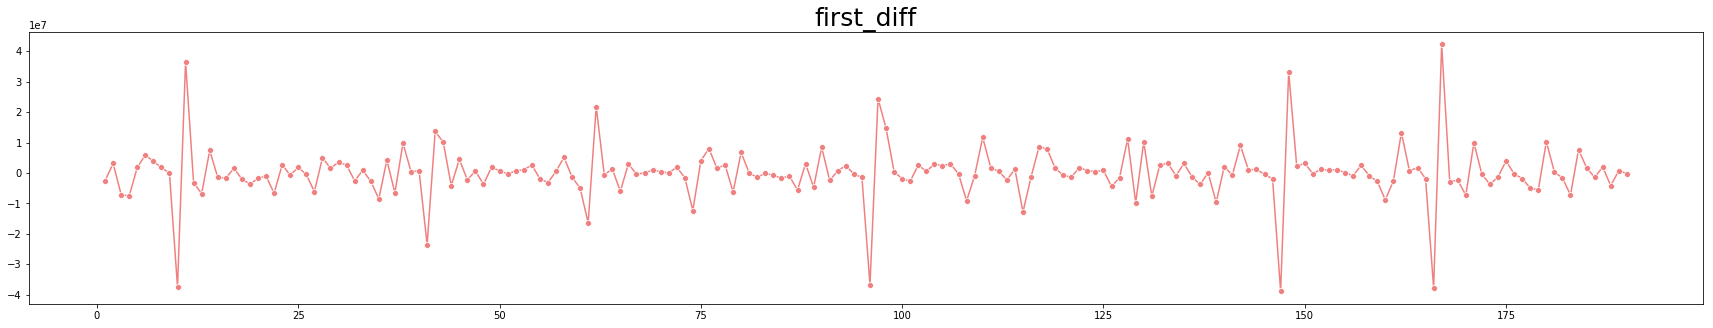

In [51]:
plt.figure(figsize = (30,5))
sns.lineplot(marker = "o",data = diff, color = 'lightcoral')
plt.title("first_diff" , size = 25)
plt.show()

### 1차 차분 후 Trend, Seasonal, Residual 재확인
* Trend 도 어느정도 제거되었고, 잔차도 이전에비해 균등한 분포. seosnal은 ...

<Figure size 432x288 with 0 Axes>

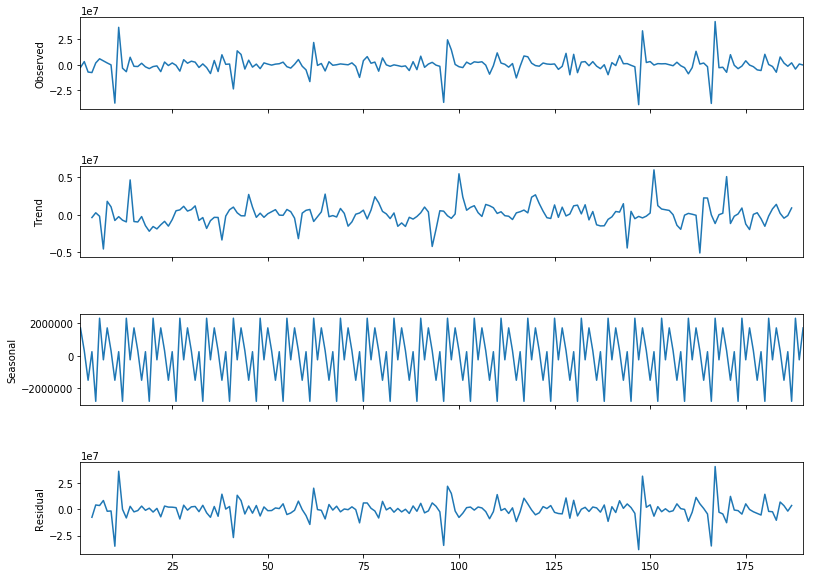

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(diff, freq=7)   # freq값은 주기 
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(13,9)
fig.show()

In [53]:
# 2차 차분
diff2 = df['pv'].diff(2).dropna(inplace=False)
diff2.head()

2      505851.0
3    -3948772.0
4   -14664237.0
5    -5780333.0
6     7692006.0
Name: pv, dtype: float64

### box-cox변환

optimal lambda: -5.224152723030198


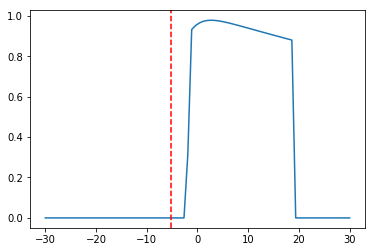

In [155]:
# 최적 람다 찾는 법
x, y = stats.boxcox_normplot(df['pv'], -30, 30)
plt.plot(x, y);
y2, l = stats.boxcox(df['pv'])
plt.axvline(x=l, color='r', ls="--");
print("optimal lambda:", l)

In [200]:
from scipy import stats
lmax = stats.boxcox_normmax(df['pv'], brack=(-20, 20),  method='mle') # method='pearsonr'
bc = stats.boxcox(df['pv'], lmax)

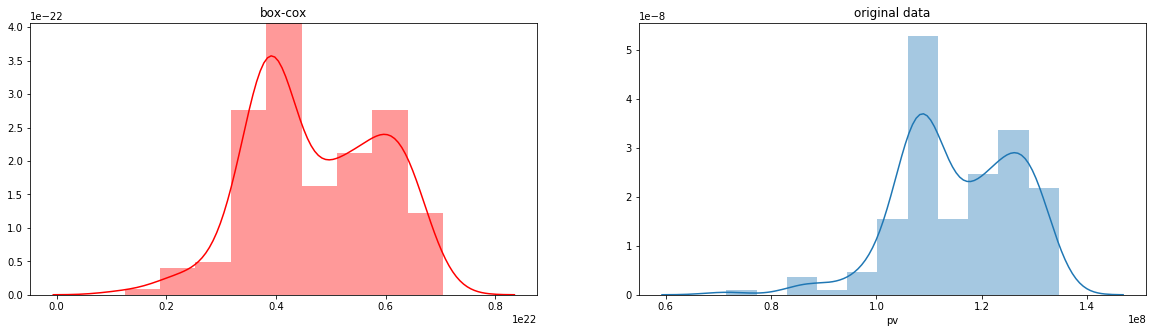

In [228]:
fig, ax=plt.subplots(1,2 , figsize=(20,5))
sns.distplot(bc, color = 'red', ax=ax[0]).set_title('box-cox')
sns.distplot(df['pv'], ax=ax[1]).set_title('original data')
plt.show()

-------------------
# ACF, PACF plot을 통해 AR 및 MA의 모수를 추정
ACF (자기상관함수): Lag에 따른 관측치들 사이의 관련성을 측정하는 함수  <br>
PACF (편자기상관함수): K이외의 모든 다른 시점 관측치의 영향력을 배제하고 yt 와 yt-k 두 관측치의 관련성을 측정하는 함수 <br>

AR모형의 Lag를 의미하는 p, MA모형의 Lag을 의미하는 q, 차분 횟수를 의미하는 d

* AR의 특성을 띄는 경우-> ACF는 천천히 감소하고 PACF는 처음 시차를 제외하고 급격히 감소한다.
* MA의 특성을 띄는 경우-> ACF는 급격히 감소하고 PACF는 천천히 감소한다.  <br>
( 급격히 감소하는 시차를 각각 AR과 MA모형의 모수(p,q)로 사용할 수 있다. )
* ARMA 모형의 차수 결정은 AIC, BIC등을 사용하여 차수 결정 (AIC 또는 BIC를 최소로하는 값) 
    * AIC란 통계모델이 얼마나 데이터에 잘 맞는지 그리고 얼마나 모델이 단순한지에 대한 평가지표
*=> AR모형은 PACF로 판단, MA모형은 ACF로 판단*

### ACF그래프로 차분이 적정한지 판단
* 자기상관이 lag 10또는 그 이상까지 계속 양의값이면, 추가 차분이 필요하고 <br>
lag 1에서 자기상관이 과하게 음수일때는 과차분일 가능성 있음. <br>
    * 실제 확인 결과 1차 차분했을때보다 3차 차분했을 때 lag1에서의 자기상관이 더 낮았음

In [54]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

### 원본 데이터 ACF, PACF plot

<Figure size 2160x360 with 0 Axes>

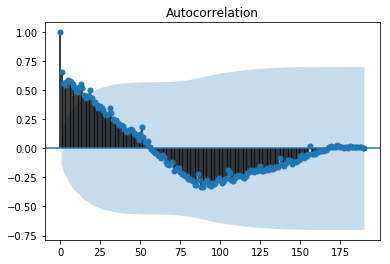

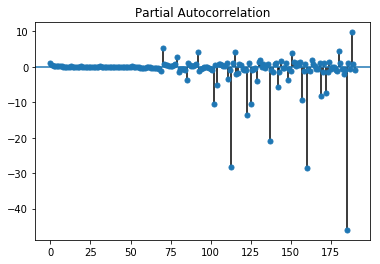

In [55]:
# 차분 전 원본 데이터
plt.figure(figsize = (30,5))
plot_acf(df['pv'])   
plot_pacf(df['pv'])
plt.show()

### 1차 차분 후 ACF, PACF plot

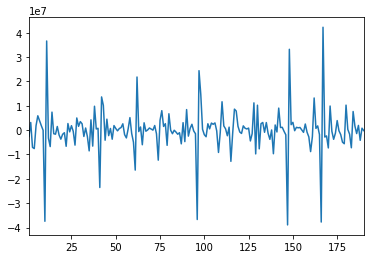

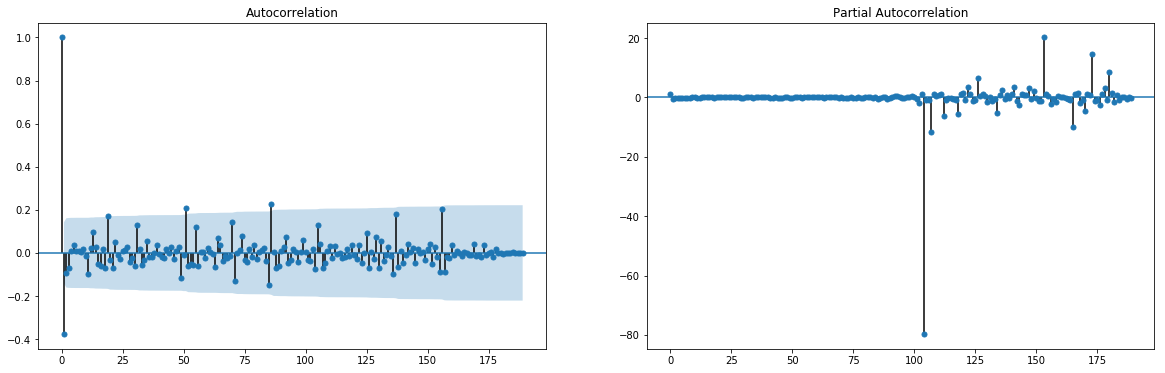

In [56]:
# pacf 그래프로 보아, AR모형임을 확인.
##  차분을 통해 acf그래프가 zero에 빠르게 가까워지도록 해야함. 그런데 이경우 급격히 0으로떨어지므로 과차분 우려가 있음.
diff.plot()
fig, ax = plt.subplots(1,2, figsize=(20,6))
plot_acf(diff, ax=ax[0])
plot_pacf(diff, ax=ax[1])
plt.show()


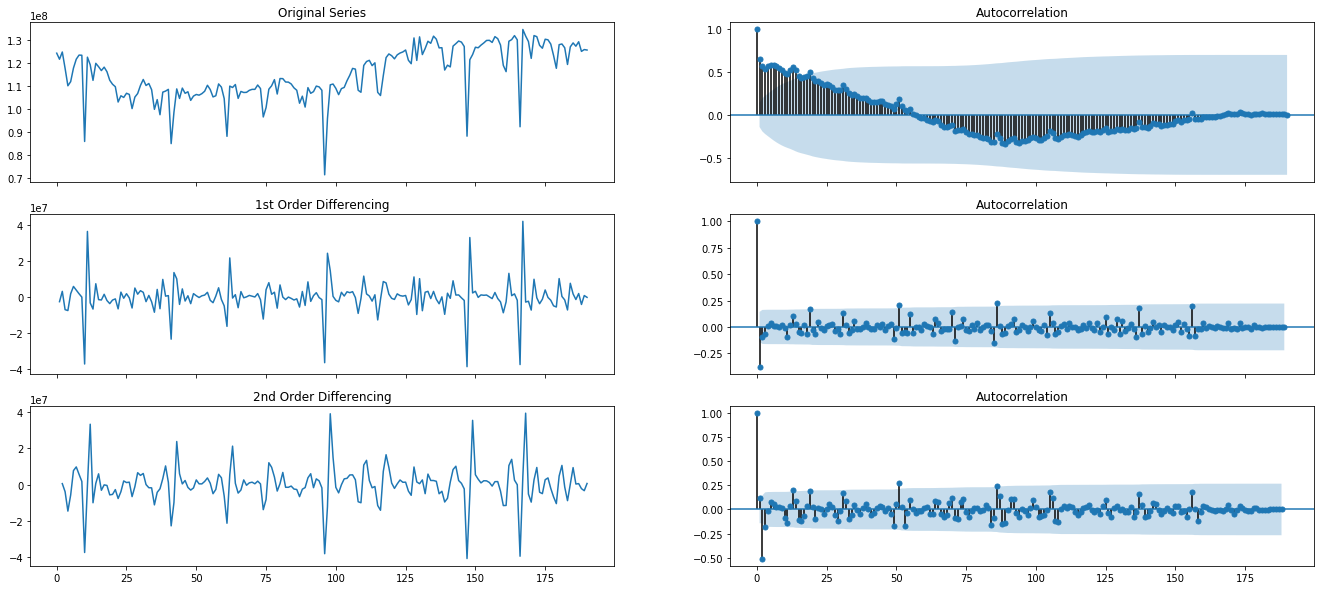

In [57]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
fig.set_size_inches(23,10)
axes[0, 0].plot(df['pv']); axes[0, 0].set_title('Original Series')
plot_acf(df['pv'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['pv'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['pv'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['pv'].diff(2)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['pv'].diff(2).dropna(), ax=axes[2, 1])

plt.show()

#### 결과
* 1차 차분만 해도 acf 그래프 자기상관이 음수로 떨어지므로 2차 차분 안해도됨.
2차 차분까지 할 경우 과차분일 우려가 있음.

# [ ARIMA ] 모형구축

In [58]:
print("Y_t:", df['pv'].values[-1])

Y_t: 125701722


In [234]:
model = ARIMA(df['pv'], order=(0,1,1))  
model_fit = model.fit(trend='nc', full_output=True,disp=1)   # 'nc' = 결정론적 추세 없음. DF검정, 'c' = 상수항만 사용, 'ct' = 상수항과 1차 추세 사용
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.pv   No. Observations:                  190
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3276.876
Method:                       css-mle   S.D. of innovations        7458715.076
Date:                Mon, 09 Sep 2019   AIC                           6557.753
Time:                        16:36:16   BIC                           6564.247
Sample:                             1   HQIC                          6560.384
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D.pv    -0.8161      0.042    -19.629      0.000      -0.898      -0.735
                                    Roots                                    
                  Real          Imaginary           M

### [해석 example]
#### order = (1,1,0), trend='c' 모형 해석 :
(+) AIC가 작을수록 최적
* ar.L1.D.uv 행에서 coef 는 계수 (theta) => -0.5359 
* const 행의 coef는 장기평균(mu) => -1.24e+04 
* S.D. of innovations 는 백색잡음의 표준편차  => 230924.702
* Y_t: 4626806

### $𝑌̂_𝑡(1) = \theta_l (𝑌_t−𝜇)+𝜇$
* 위 식에 대입해서 다음 값을 예측하면, -0.5359 * (4626806 - mu값 ) +mu값

# 모형진단
잔차에 대한 정규성 검정 , 잔차에 대한 ACF분석 또는 융박스(Ljung-Box Q)검정으로 모형 차수 재확인 <br>
(+) 잔차가 서로 독립이고 시간에 따라 평균과 분산이 일정한지 검증<br>
    *=> 실제 상황에서, 보통은 모델이 모든 검정을 통과하지 못하더라도 찾을 수 있었던 가장 좋은 모델을 사용함.*

* 잔차 : 주어진 시계열을 생성하기 위해 입력되었던 백색 잡음에 대한 추정값. <br>
즉, Yt와 모형에서 추정된 이 값에 대한 예측치의 차이. 따라서 모형이 훌륭하다면 이 값은 더이상 예측할 수 있는 요소가 전혀 없는 시계열, 백색잡음에 가까운 특성을 보여야 함.
* 잔차가 가우시안 백색 잡은인지 확인하기 위한 방법
    * 잔차 분포의 정규성 검정
    * 잔차의 자기상관계수가 k=0 을 제외하고 모두 0

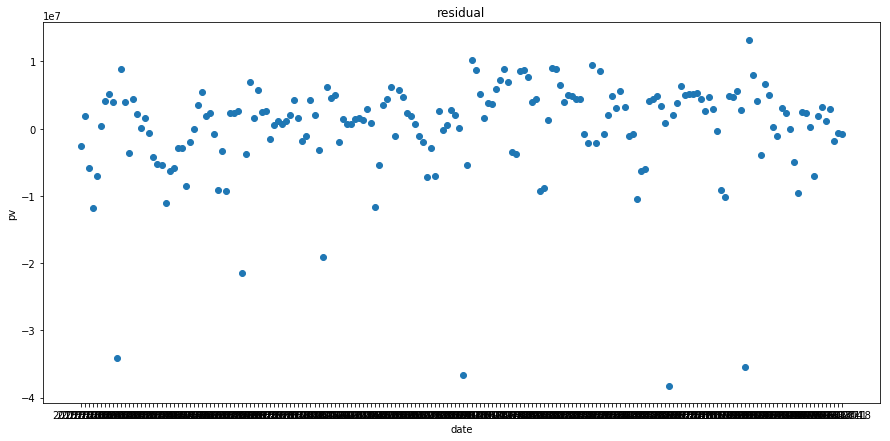

In [236]:
# 잔차 분포 확인
plt.figure(figsize=(15,7))
plt.scatter(df['date'][:-1],model_fit.resid)
plt.xlabel('date')
plt.ylabel('pv')
plt.title('residual')
plt.show()

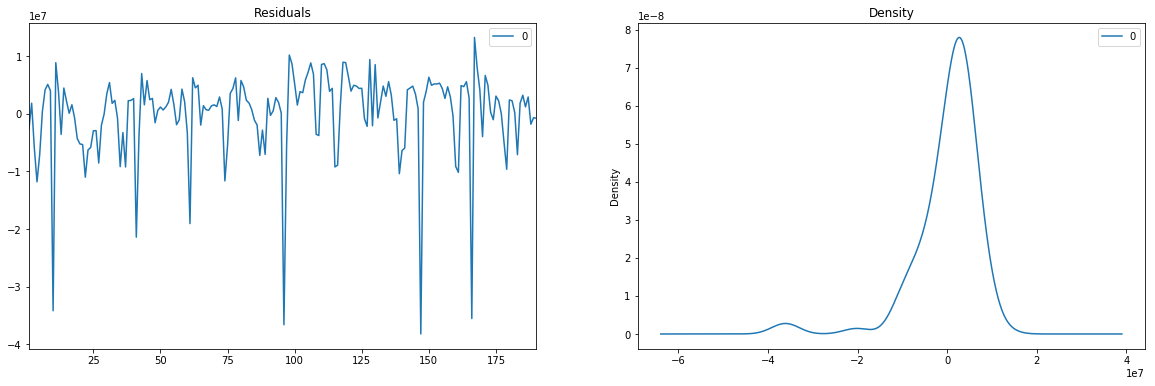

In [60]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize = (20,6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

### **잔차의 정규성 검정**

In [61]:
# p-value < 0.05 이므로 정규분포라고 볼 수 없다.
from scipy.stats import normaltest 
normaltest(model_fit.resid)

NormaltestResult(statistic=130.45287830933864, pvalue=4.70454255095216e-29)

### (1) Q-Q plot
* 잔차의 정규성을 확인하기 위함.

<Figure size 432x288 with 0 Axes>

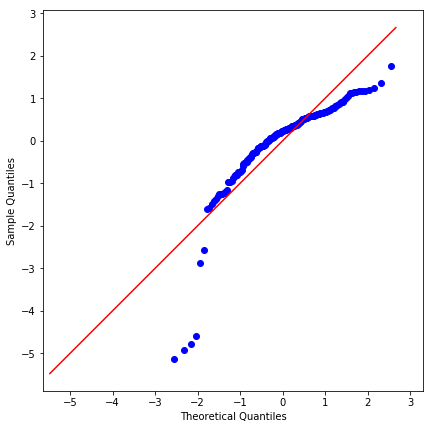

In [231]:
fig = plt.figure()
fig = sm.qqplot(model_fit.resid, fit=True, line='45')
fig.set_size_inches(15,7)
plt.gca().axis("square")
plt.show()

### **잔차의 독립성 검정**
### (1) acf plot

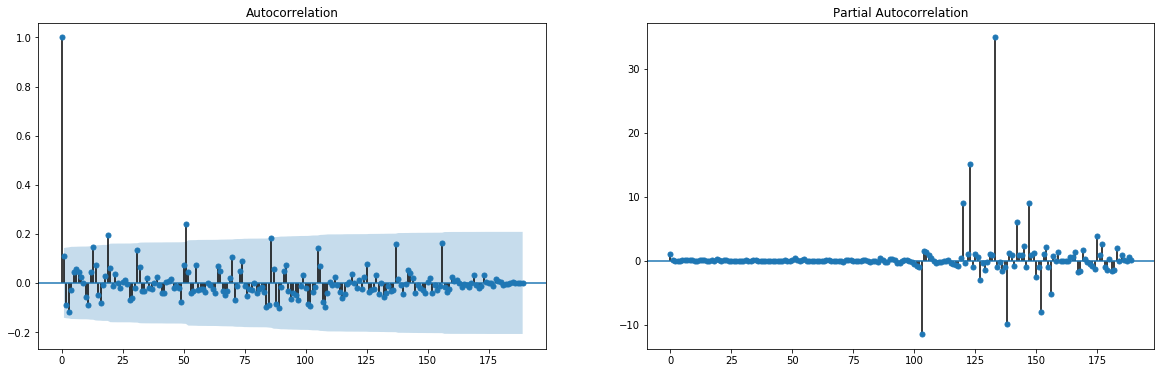

In [63]:
# 잔차의 acf
fig, ax = plt.subplots(1,2, figsize=(20,6))
plot_acf(residuals, ax=ax[0])
plot_pacf(residuals, ax=ax[1])
plt.show()

### (2)Ljung-Box 검정 
ARIMA등 시계열 분석 모형을 적합한 후에, 잔차가 독립적임을 확인하기 위해 가정을 평가하는 데 사용.
* Ljung-Box 통계량은 시차 k에 대한 자기 상관이 0이라는 귀무가설을 검증하기 위해 사용.
    * 결과 : 시차 20까지의 모든 p-value가 0.05이상이므로 ACF가 0이라는 귀무가설을 받아들일 수 있다.

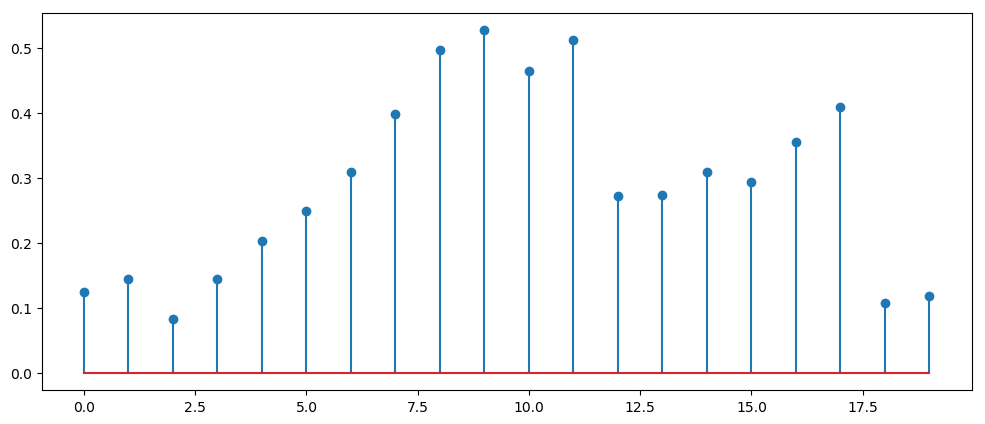

In [64]:
# Ljung-Box 검정 결과
# x 축 : 시차 , y축 : p-value
qvalue, pvalue = sm.stats.acorr_ljungbox(model_fit.resid, 20)
plt.figure(figsize=(12,5), dpi=100)
plt.stem(pvalue)
plt.show()

# 예측

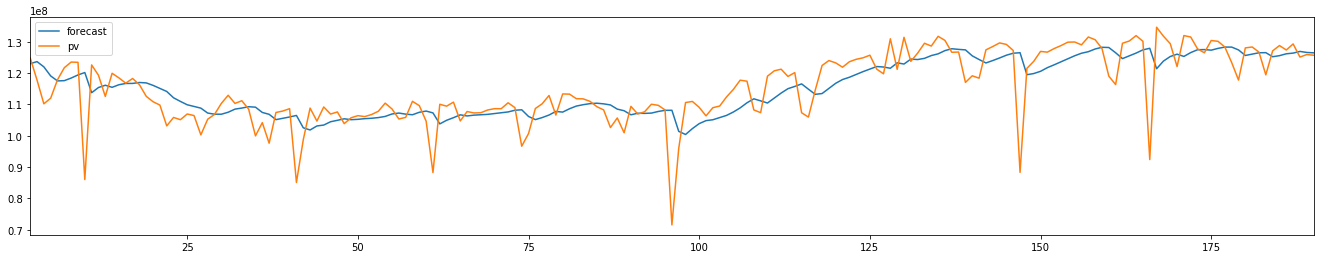

In [65]:
fig = model_fit.plot_predict()
fig.set_size_inches(23,4)

In [66]:
# 순서대로 예측값, stderr, upper bound, lower bound  의미.
fore = model_fit.forecast(steps=1)
print(fore)

(array([1.26320271e+08]), array([7458715.07599529]), array([[1.11701458e+08, 1.40939084e+08]]))


## [ ARIMA모형 ] out - of - time Cross Validation

In [102]:
# split data : train75: test 25 
train = df['pv'][:143]
test = df['pv'][143:]

In [103]:
print("train : ",train.shape , "test : " , test.shape)

train :  (143,) test :  (48,)


In [104]:
# Build Model
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1) 

In [105]:
# Forecast
fc, se, conf = fitted.forecast(48,alpha=0.05)  # 95% conf , 48은 test data 개수

In [106]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

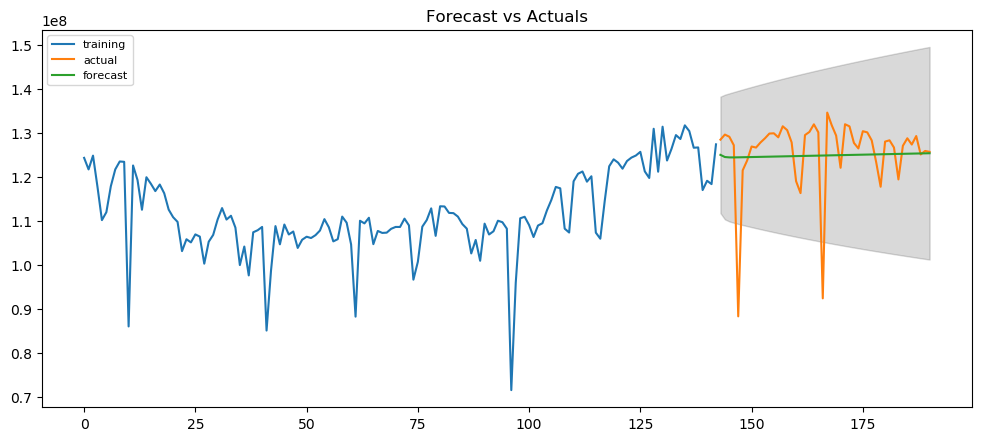

In [107]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Accuracy Metrics 
* Mean Absolute Percentage Error (MAPE)
### $MAPE = \frac{100}{n} \sum_{t=1}^n \mid\frac{A_t - F_t}{A_t} \mid$

* Mean Error (ME)
* Mean Absolute Error (MAE)
* Mean Percentage Error (MPE)
* Root Mean Squared Error (RMSE)
* Lag 1 Autocorrelation of Error (ACF1)
* Correlation between the Actual and the Forecast (corr)
* Min-Max Error (minmax)

##### 두개의 다른 series를 비교한다면, MAPE, Correlation, Min-Max Error 세가지 이용
    => 이유 : 이 세가지가 0~1 사이의 확률값이기 때문에 예측이 얼마나 잘됐는지 평가할 수 있음. 



In [108]:
from statsmodels.tsa.stattools import acf
test.shape

(48,)

In [109]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':round(mape,3), 'me':round(me,3), 'mae': round(mae,3), 
            'mpe': round(mpe,3), 'rmse':round(rmse,3), 'acf1':round(acf1,3), 
            'corr':round(corr,3), 'minmax':round(minmax,3)})

forecast_accuracy(fc, test.values)


{'mape': 0.047,
 'me': -1018734.466,
 'mae': 5377015.228,
 'mpe': -0.002,
 'rmse': 8370434.328,
 'acf1': -0.002,
 'corr': 0.117,
 'minmax': 0.042}

--------------------------
# Auto Arima Forecast
* pmdarima : R에서 auto arima 의 python 버전 

In [75]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from pmdarima.arima import auto_arima

In [76]:
model = pm.auto_arima(df['pv'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 1, 1); AIC=6558.513, BIC=6571.501, Fit time=0.223 seconds
Fit ARIMA: order=(0, 1, 0); AIC=6632.026, BIC=6638.520, Fit time=0.006 seconds
Fit ARIMA: order=(1, 1, 0); AIC=6605.153, BIC=6614.894, Fit time=0.026 seconds
Fit ARIMA: order=(0, 1, 1); AIC=6559.703, BIC=6569.444, Fit time=0.054 seconds
Fit ARIMA: order=(2, 1, 1); AIC=6559.231, BIC=6575.466, Fit time=0.210 seconds
Fit ARIMA: order=(1, 1, 2); AIC=6559.992, BIC=6576.228, Fit time=0.214 seconds
Fit ARIMA: order=(2, 1, 2); AIC=6559.398, BIC=6578.881, Fit time=0.345 seconds
Total fit time: 1.097 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  190
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3275.257
Method:                       css-mle   S.D. of innovations        7396132.233
Date:                Mon, 09 Sep 2019   AIC                           6558.513
Time:                 

### 모델 진단 (with Auto ARIMA)

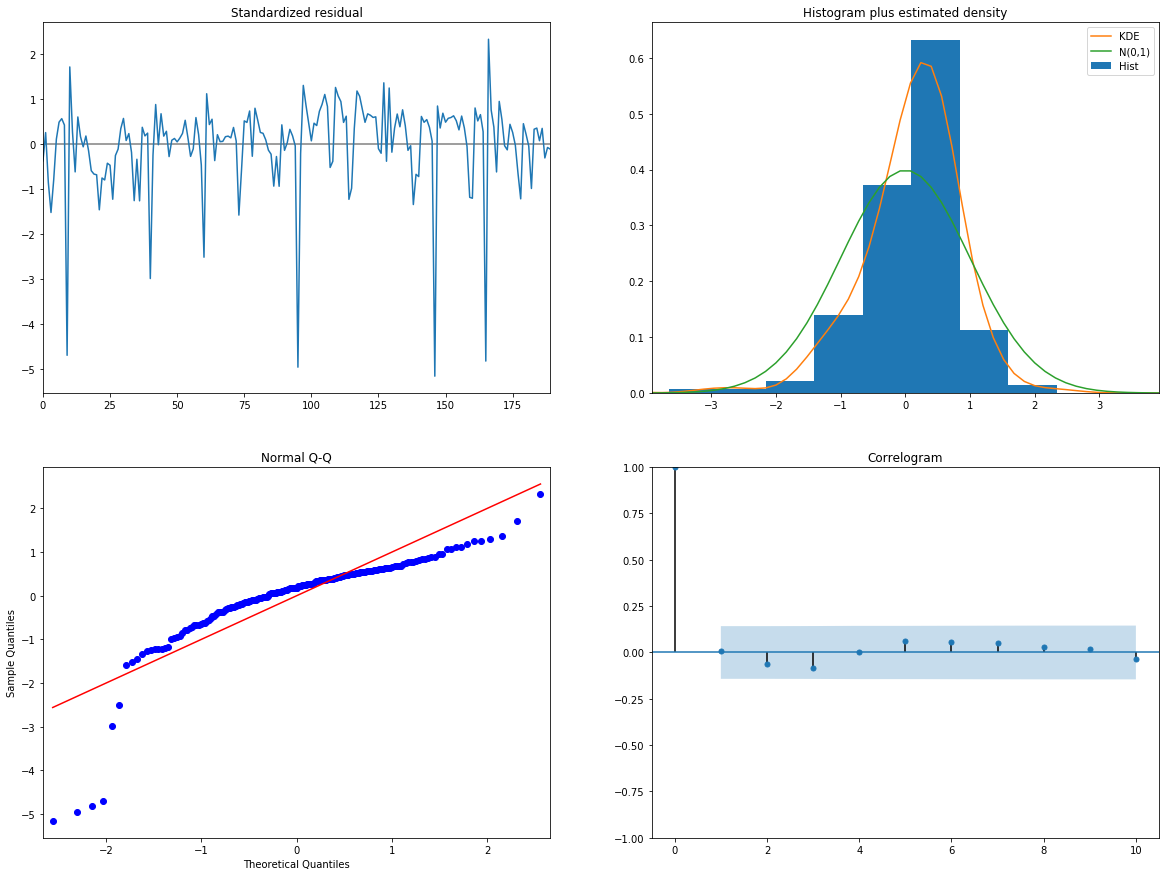

In [77]:
model.plot_diagnostics(figsize=(20,15))
plt.show()

### 결과
Standardized residual : 잔차가 평균은 0에가까워야하고, 균등하게 변동이 있어야 하는데 균등하지 않고 튀는 값이 보임. <br>
Histogram plus estimateed density : 정규분포를 따르는가 ,, 약간 부족<br>
q-q plot : 파란 점들이 빨간 라인을 따라야 하는데, 일부 따르지 않는게 보임.<br>
Correlogram : 잔차는 자기상관이 없음.<br>


------------

#  **SARIMA 모델**
계절성을 반영한 모델로 이전 시점값을 빼는것이 아닌, 이전 시즌의 값을 뺌
* SARIMA(p,d,q)x(P,D,Q)

SARIMA모형은 기존 ARIMA 모형에서 SAR항과 SMA항을 추가함으로써, 시계열자료의 계절성, 혹은 주기성을 감안할 수 없는 ARIMA모형의 한계점을 극복할 수 있다.

* 시계열 자료를 Sarima기법에 적용하기에 앞서 반드시 안정성 여부를 확인해야함

In [78]:
df[['date','pv']].to_csv('weekly data_filter.csv',index=False)

* 데이터 전처리 : 이 모델에서는 데이터에 'date'값이 들어가야 해서 따로 처리해줌
* read_csv 인수
    * parse_dates : 인덱스 열이나 복수 열의 날짜를 파싱할지 여부 
    * index_col : row index 열 정의

In [79]:
# data형식으로 읽기 위해 parse_dates파라미터 추가해서 데이터 다시불러오기
data = pd.read_csv('weekly data_filter.csv', parse_dates=['date'], index_col='date')
data.head()

,pv
date,
2015-12-03,124339820
2015-12-10,121712570
2015-12-17,124845671
2015-12-24,117763798
2015-12-31,110181434


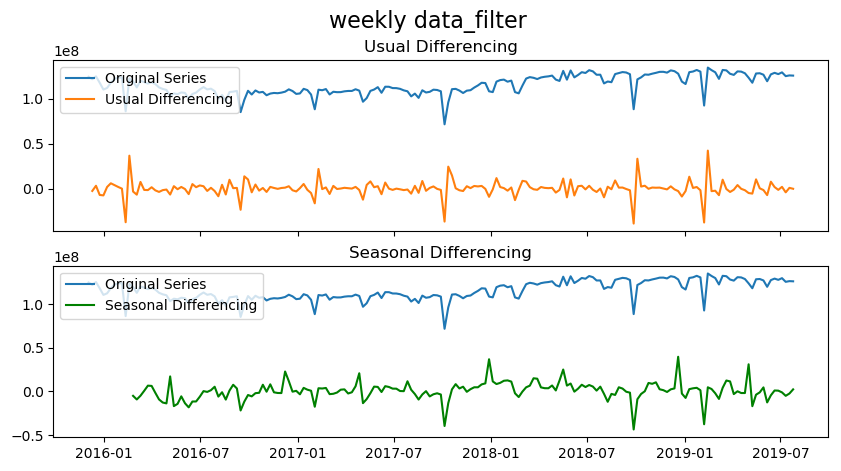

In [80]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('weekly data_filter', fontsize=16)
plt.show()

# SARIMA 모델 : auto_arima로 최적 파라미터 찾기

<결과>

SARIMAX(1, 0, 1)x(2, 1, 2, 12)

ARIMA 적용 시 AIC = 6558.513 <br>
SARIMA 적용 시 AIC = 6262.189 <br>
* SARIMA적용했을 때 AIC값이 더 좋아지긴 함

In [81]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=6270.370, BIC=6286.307, Fit time=1.609 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=6291.288, BIC=6297.663, Fit time=0.039 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=6276.227, BIC=6288.977, Fit time=0.529 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=6274.398, BIC=6287.148, Fit time=0.593 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=6266.735, BIC=6285.859, Fit time=1.648 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 0, 12); AIC=6278.175, BIC=6294.112, Fit time=0.938 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=6267.181, BIC=6289.493, Fit time=5.380 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=6289.348, BIC=6302.097, Fit time=0.265 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 1, 2, 12); AIC=6262.189, BIC=6287.688, Fit time=8.765 seconds
Fit ARIMA: order=(0, 0, 1) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  191
Model:             SARIMAX(1, 0, 1)x(2, 1, 2, 12)   Log Likelihood               -3123.095
Date:                            Mon, 09 Sep 2019   AIC                           6262.189
Time:                                    13:27:49   BIC                           6287.688
Sample:                                         0   HQIC                          6272.529
                                            - 191                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.159e+05   7.06e-08   7.31e+12      0.000    5.16e+05    5.16e+05
ar.L1          0.9035      0.020     44.089      0.000       0.863       0.944
ma.L1         -0.8315      0.031    -26.608      0.000      -0.893      -0.770
ar.S.L12      -0.7256      0.174     -4.161      0.000      -1.067      -0.384
ar.S.L24       0.2483      0.104      2.383      0.017       0.044       0.453
ma.S.L12       0.3626      0.164      2.215      0.027       0.042       0.683
ma.S.L24      -0.6103      0.138     -4.416      0.000      -0.881      -0.339
sigma2       9.92e+13   2.86e-15   3.47e+28      0.000    9.92e+13    9.92e+13
===================================================================================
Ljung-Box (Q):                       34.42   Jarque-Bera (JB):               420.51
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                            -1.44
Prob(H) (two-sided):                  0.20   Kurtosis:                         9.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.54e+44. Standard errors may be unstable.
"""

# SARIMA 모델 예측
<freq 인수값>

s: 초  <br>
T: 분<br>
H: 시간<br>
D: 일(day)<br>
7D : 일주일 <br>
B: 주말이 아닌 평일<br>
W: 주(일요일)<br>
W-MON: 주(월요일)<br>
M: 각 달(month)의 마지막 날<br>
MS: 각 달의 첫날<br>
BM: 주말이 아닌 평일 중에서 각 달의 마지막 날<br>
BMS: 주말이 아닌 평일 중에서 각 달의 첫날<br>
WOM-2THU: 각 달의 두번째 목요일<br>
Q-JAN: 각 분기의 첫달의 마지막 날<br>
Q-DEC: 각 분기의 마지막 달의 마지막 날<br>

In [82]:
pd.date_range(data.index[-1], periods = 12, freq='7D')  # 1주일 간격

DatetimeIndex(['2019-07-25', '2019-08-01', '2019-08-08', '2019-08-15',
               '2019-08-22', '2019-08-29', '2019-09-05', '2019-09-12',
               '2019-09-19', '2019-09-26', '2019-10-03', '2019-10-10'],
              dtype='datetime64[ns]', freq='7D')

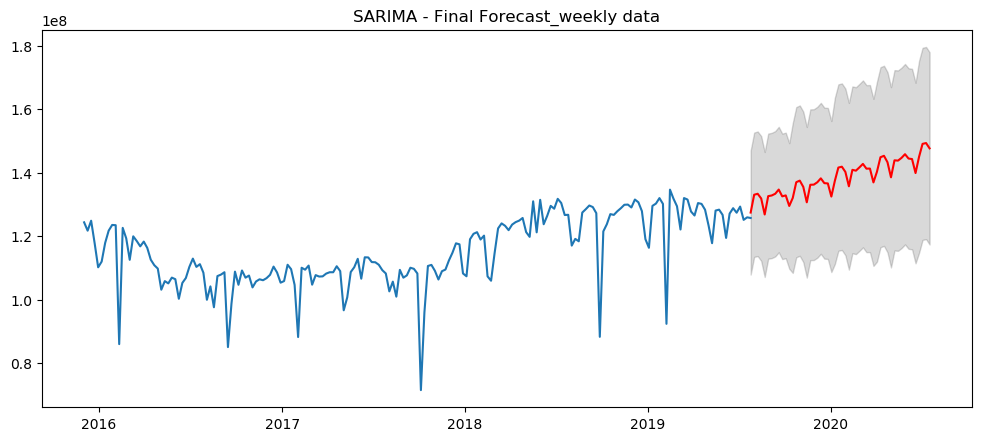

In [83]:
# Forecast
# n_peirods = 12이고, freq='M' 으로 할 경우 각 달의 마지막날 12개니까 1년 예측한 값
# n_peirods = 52이고, freq='7D'로 할 경우  1년 예측값
n_periods = 52
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='7D')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data)
plt.plot(fitted_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast_weekly data")
plt.show()

# [ SARIMA 모형 ] : Out-of-Time Cross validation

In [84]:
# train, test 비율 : 75:25
train_s = data[:143]
test_s = data[143:]

In [85]:
print(train_s.shape)
print(test_s.shape)

(143, 1)
(48, 1)


In [86]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel_test = pm.auto_arima(train_s, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4566.009, BIC=4571.744, Fit time=0.052 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4547.813, BIC=4559.283, Fit time=0.470 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4534.210, BIC=4545.680, Fit time=0.387 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=4531.234, BIC=4545.571, Fit time=0.712 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=4546.114, BIC=4557.584, Fit time=0.313 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=4535.150, BIC=4552.355, Fit time=1.154 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=4563.818, BIC=4572.420, Fit time=0.107 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=4534.073, BIC=4554.146, Fit time=3.340 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_orde

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  191
Model:             SARIMAX(1, 0, 1)x(2, 1, 2, 12)   Log Likelihood               -3123.095
Date:                            Mon, 09 Sep 2019   AIC                           6262.189
Time:                                    13:29:02   BIC                           6287.688
Sample:                                         0   HQIC                          6272.529
                                            - 191                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.159e+05   7.06e-08   7.31e+12      0.000    5.16e+05    5.16e+05
ar.L1          0.9035      0.020     44.089      0.000       0.863       0.944
ma.L1         -0.8315      0.031    -26.608      0.000      -0.893      -0.770
ar.S.L12      -0.7256      0.174     -4.161      0.000      -1.067      -0.384
ar.S.L24       0.2483      0.104      2.383      0.017       0.044       0.453
ma.S.L12       0.3626      0.164      2.215      0.027       0.042       0.683
ma.S.L24      -0.6103      0.138     -4.416      0.000      -0.881      -0.339
sigma2       9.92e+13   2.86e-15   3.47e+28      0.000    9.92e+13    9.92e+13
===================================================================================
Ljung-Box (Q):                       34.42   Jarque-Bera (JB):               420.51
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                            -1.44
Prob(H) (two-sided):                  0.20   Kurtosis:                         9.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.54e+44. Standard errors may be unstable.
"""

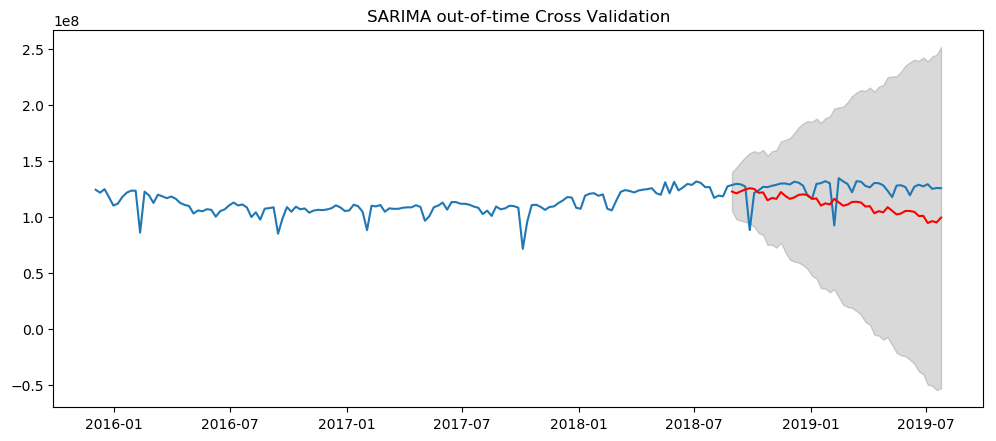

In [87]:
# Forecast
n_periods = 48   # 이 경우는 실제값과 예측값 오차 MAPE 확인하려고 기간 48로 지정한것. (test데이터 개수 : 48개)
fitted, confint = smodel_test.predict(n_periods=n_periods, return_conf_int=True)

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=test_s.index)
lower_series = pd.Series(confint[:, 0], index=test_s.index)
upper_series = pd.Series(confint[:, 1], index=test_s.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data)
plt.plot(fitted_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA out-of-time Cross Validation")
plt.show()


# SARIMA : Accuracy Metrics

In [88]:
# Accuracy metrics
## mape : 10.1% 의미는 모델이 89.9% 정확도로 다음 값을 예측한다는 의미.
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fitted, test.values)

{'mape': 0.13360648265101602,
 'me': -13859986.1611942,
 'mae': 16583593.920143478,
 'mpe': -0.10378403774684293,
 'rmse': 18911113.28833368,
 'acf1': -0.0012628614892141558,
 'corr': -0.19329936811035262,
 'minmax': 0.12985875805886649}

# SARIMA 모형 진단

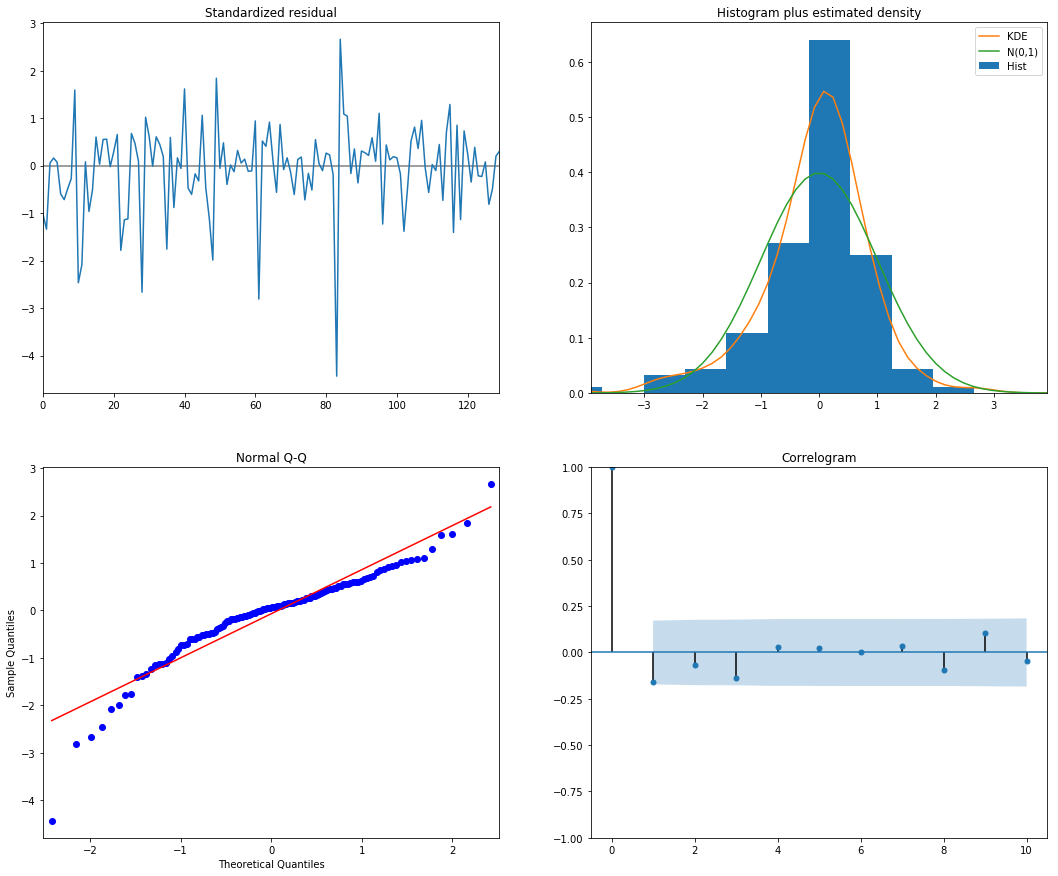

In [89]:
smodel_test.plot_diagnostics(figsize=(18,15))
plt.show()

--------------------
# 결과
### ARIMA모델과 SARIMA모델 비교
* MAPE의 경우 ARIMA= 0.047, SARIMA=0.13로 **ARIMA모델**이 SARIMA모델보다 낮고,<br>
minmax error도 ARIMA=0.042, SARIMA=0.13 으로 **ARIMA모델**이 SARIMA모델보다 낮다.  <br>
correlation은 ARIMA에서는 양수값 0.117을 띄었는데, SARIMA에서는 음수값 -0.193을 띔 .. <br>
    * 즉, 전반적으로 weekly데이터에서는 **ARIMA모델이 SARIMA보다 더 잘 맞음.**
    
        * AIC값은 SARIMA가 더 낮으므로 모델적합도는 SARIMA가 더 나음.